## IMPORTING LIBRARIES

In [35]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
df=pd.read_csv("E:/LETS_GROW_MORE_TASKS/NSE-TATAGLOBAL.csv")

In [37]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [41]:
# choosing the 'Close' column to predict and forecast


df=d.reset_index()['Close']

df.shape


(2035,)

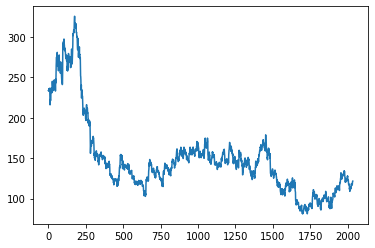

In [43]:
df.plot()

plt.show()

## SCALING THE VALUES

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

df=scaler.fit_transform(np.array(df).reshape(-1,1))

## SPLITTING THE DATA INTO TRAIN AND TEST

In [46]:
training_size=int(len(df)*0.65)

test_size=len(df)-training_size

train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]


## CREATING FEATURES AND TARGETS FOR TRAIN AND TEST DATA

In [48]:
def create_dataset(dataset,timestep=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + timestep, 0])
    return numpy.array(dataX), numpy.array(dataY)



timestep=100

x_train,y_train=create_dataset(train_data,timestep)

x_test,y_test=create_dataset(test_data,timestep)

In [49]:
print(x_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [50]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1221, 100), (1221,), (612, 100), (612,))

## RESHAPING DATA TO FIT INTO LSTM MODEL

In [51]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))

## CREATING STACKED LSTM MODEL

In [52]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 64s 1s/step - loss: 0.0222 - val_loss: 0.0057
Epoch 2/100
20/20 [==============================] - 13s 648ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/100
20/20 [==============================] - 13s 677ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 13s 656ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 13s 634ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 14s 699ms/step - loss: 0.0015 - val_loss: 9.2715e-04
Epoch 7/100
20/20 [==============================] - 13s 653ms/step - loss: 0.0017 - val_loss: 9.1866e-04
Epoch 8/100
20/20 [==============================] - 14s 692ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 13s 657ms/step - loss: 0.0013 - val_loss: 9.4163e-04
Epoch 10/100
20/20 [==============================] - 13s 666ms/step - lo

## EVALUATING THE MODEL

In [56]:
train_predict=model.predict(x_train)
    
test_predict=model.predict(x_test)


train_predict=scaler.inverse_transform(train_predict)

test_predict=scaler.inverse_transform(test_predict)


from sklearn.metrics import mean_squared_error

train_mse=(mean_squared_error(train_predict,y_train))**0.5

test_mse=(mean_squared_error(test_predict,y_test))**0.5


print('Training Mean Squared Error : {}'.format(train_mse))

print('Testing Mean Squared Error : {}'.format(test_mse))

Training Mean Squared Error : 163.48732079937048
Testing Mean Squared Error : 115.817710289916


## PLOTING THE PREDICTIONS

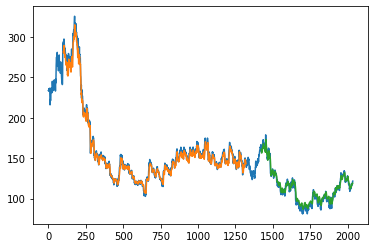

In [57]:
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## FORECASTING USING STACKED LSTM MODEL

In [58]:


x_input=test_data[613:].reshape(1,-1)
x_input.shape

x_input

array([[0.12479575, 0.13848039, 0.14011438, 0.13888889, 0.13541667,
        0.14011438, 0.1380719 , 0.13071895, 0.13071895, 0.12867647,
        0.11846405, 0.14644608, 0.14808007, 0.15910948, 0.15992647,
        0.15788399, 0.16441993, 0.17892157, 0.17933007, 0.19260621,
        0.20812908, 0.18974673, 0.18055556, 0.18239379, 0.17708333,
        0.17810458, 0.18055556, 0.17810458, 0.17851307, 0.19607843,
        0.18913399, 0.18954248, 0.19403595, 0.19444444, 0.20200163,
        0.19771242, 0.19934641, 0.19873366, 0.1997549 , 0.2128268 ,
        0.21568627, 0.20445261, 0.21772876, 0.21098856, 0.21425654,
        0.19750817, 0.18811275, 0.17851307, 0.17381536, 0.16033497,
        0.16564542, 0.17116013, 0.17422386, 0.18035131, 0.17401961,
        0.16278595, 0.16973039, 0.17810458, 0.17034314, 0.16830065,
        0.17279412, 0.17544935, 0.18382353, 0.19138072, 0.18913399,
        0.19097222, 0.17238562, 0.16830065, 0.1693219 , 0.17177288,
        0.16156046, 0.14971405, 0.1503268 , 0.15

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
# Forecasting for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16271323]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

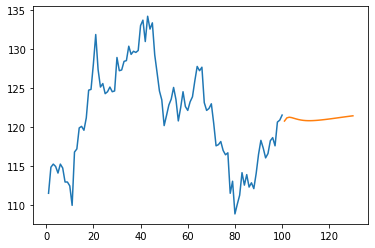

In [62]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

plt.plot(day_new,scaler.inverse_transform(df[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

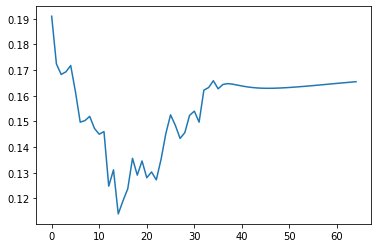

In [69]:
# Forecasted plot

df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

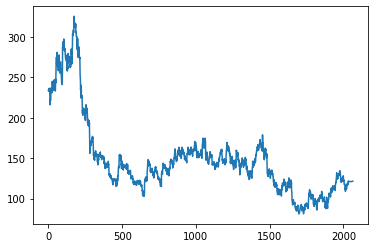

In [70]:

#Plot including forecasting
df3=df.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)



plt.show()